# Prediction on People Survive

## Aim: To Predicted the people who are surviving Gender wise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt = pd.read_csv('train.csv')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

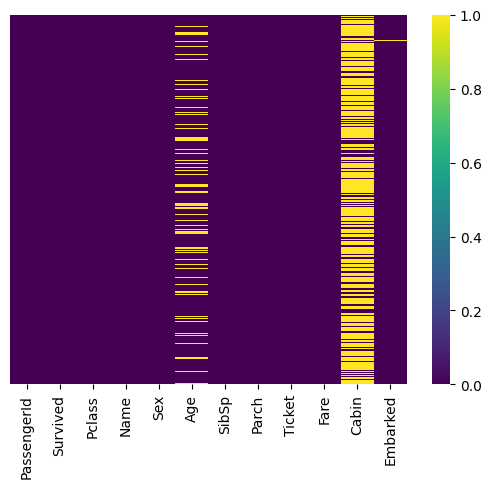

In [4]:
sns.heatmap(dt.isnull(), cmap='viridis', yticklabels=False)

In [5]:
dt.drop('Cabin', axis=1, inplace=True)
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
dt['Age'] = dt['Age'].fillna(dt['Age'].mean())

In [8]:
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
dt['Embarked'] = dt['Embarked'].fillna(dt['Embarked'].mode()[0])

<AxesSubplot: >

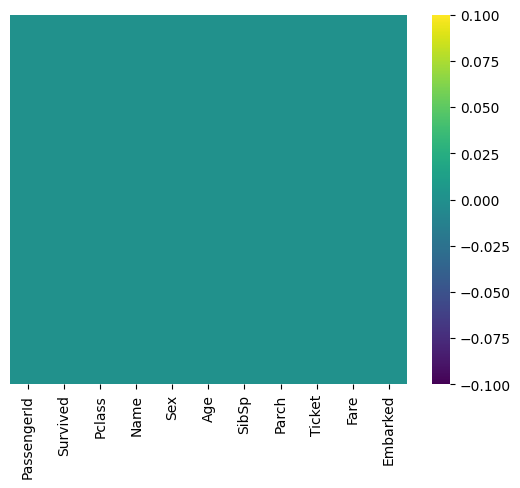

In [10]:
sns.heatmap(dt.isnull(), cmap='viridis', yticklabels=False)

In [11]:
dt['Sex'] = dt['Sex'].map({'male':1,'female':0})

In [12]:
dt['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
dt['Embarked'] = dt['Embarked'].map({'S':2,'C':4,'Q':6})

In [14]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


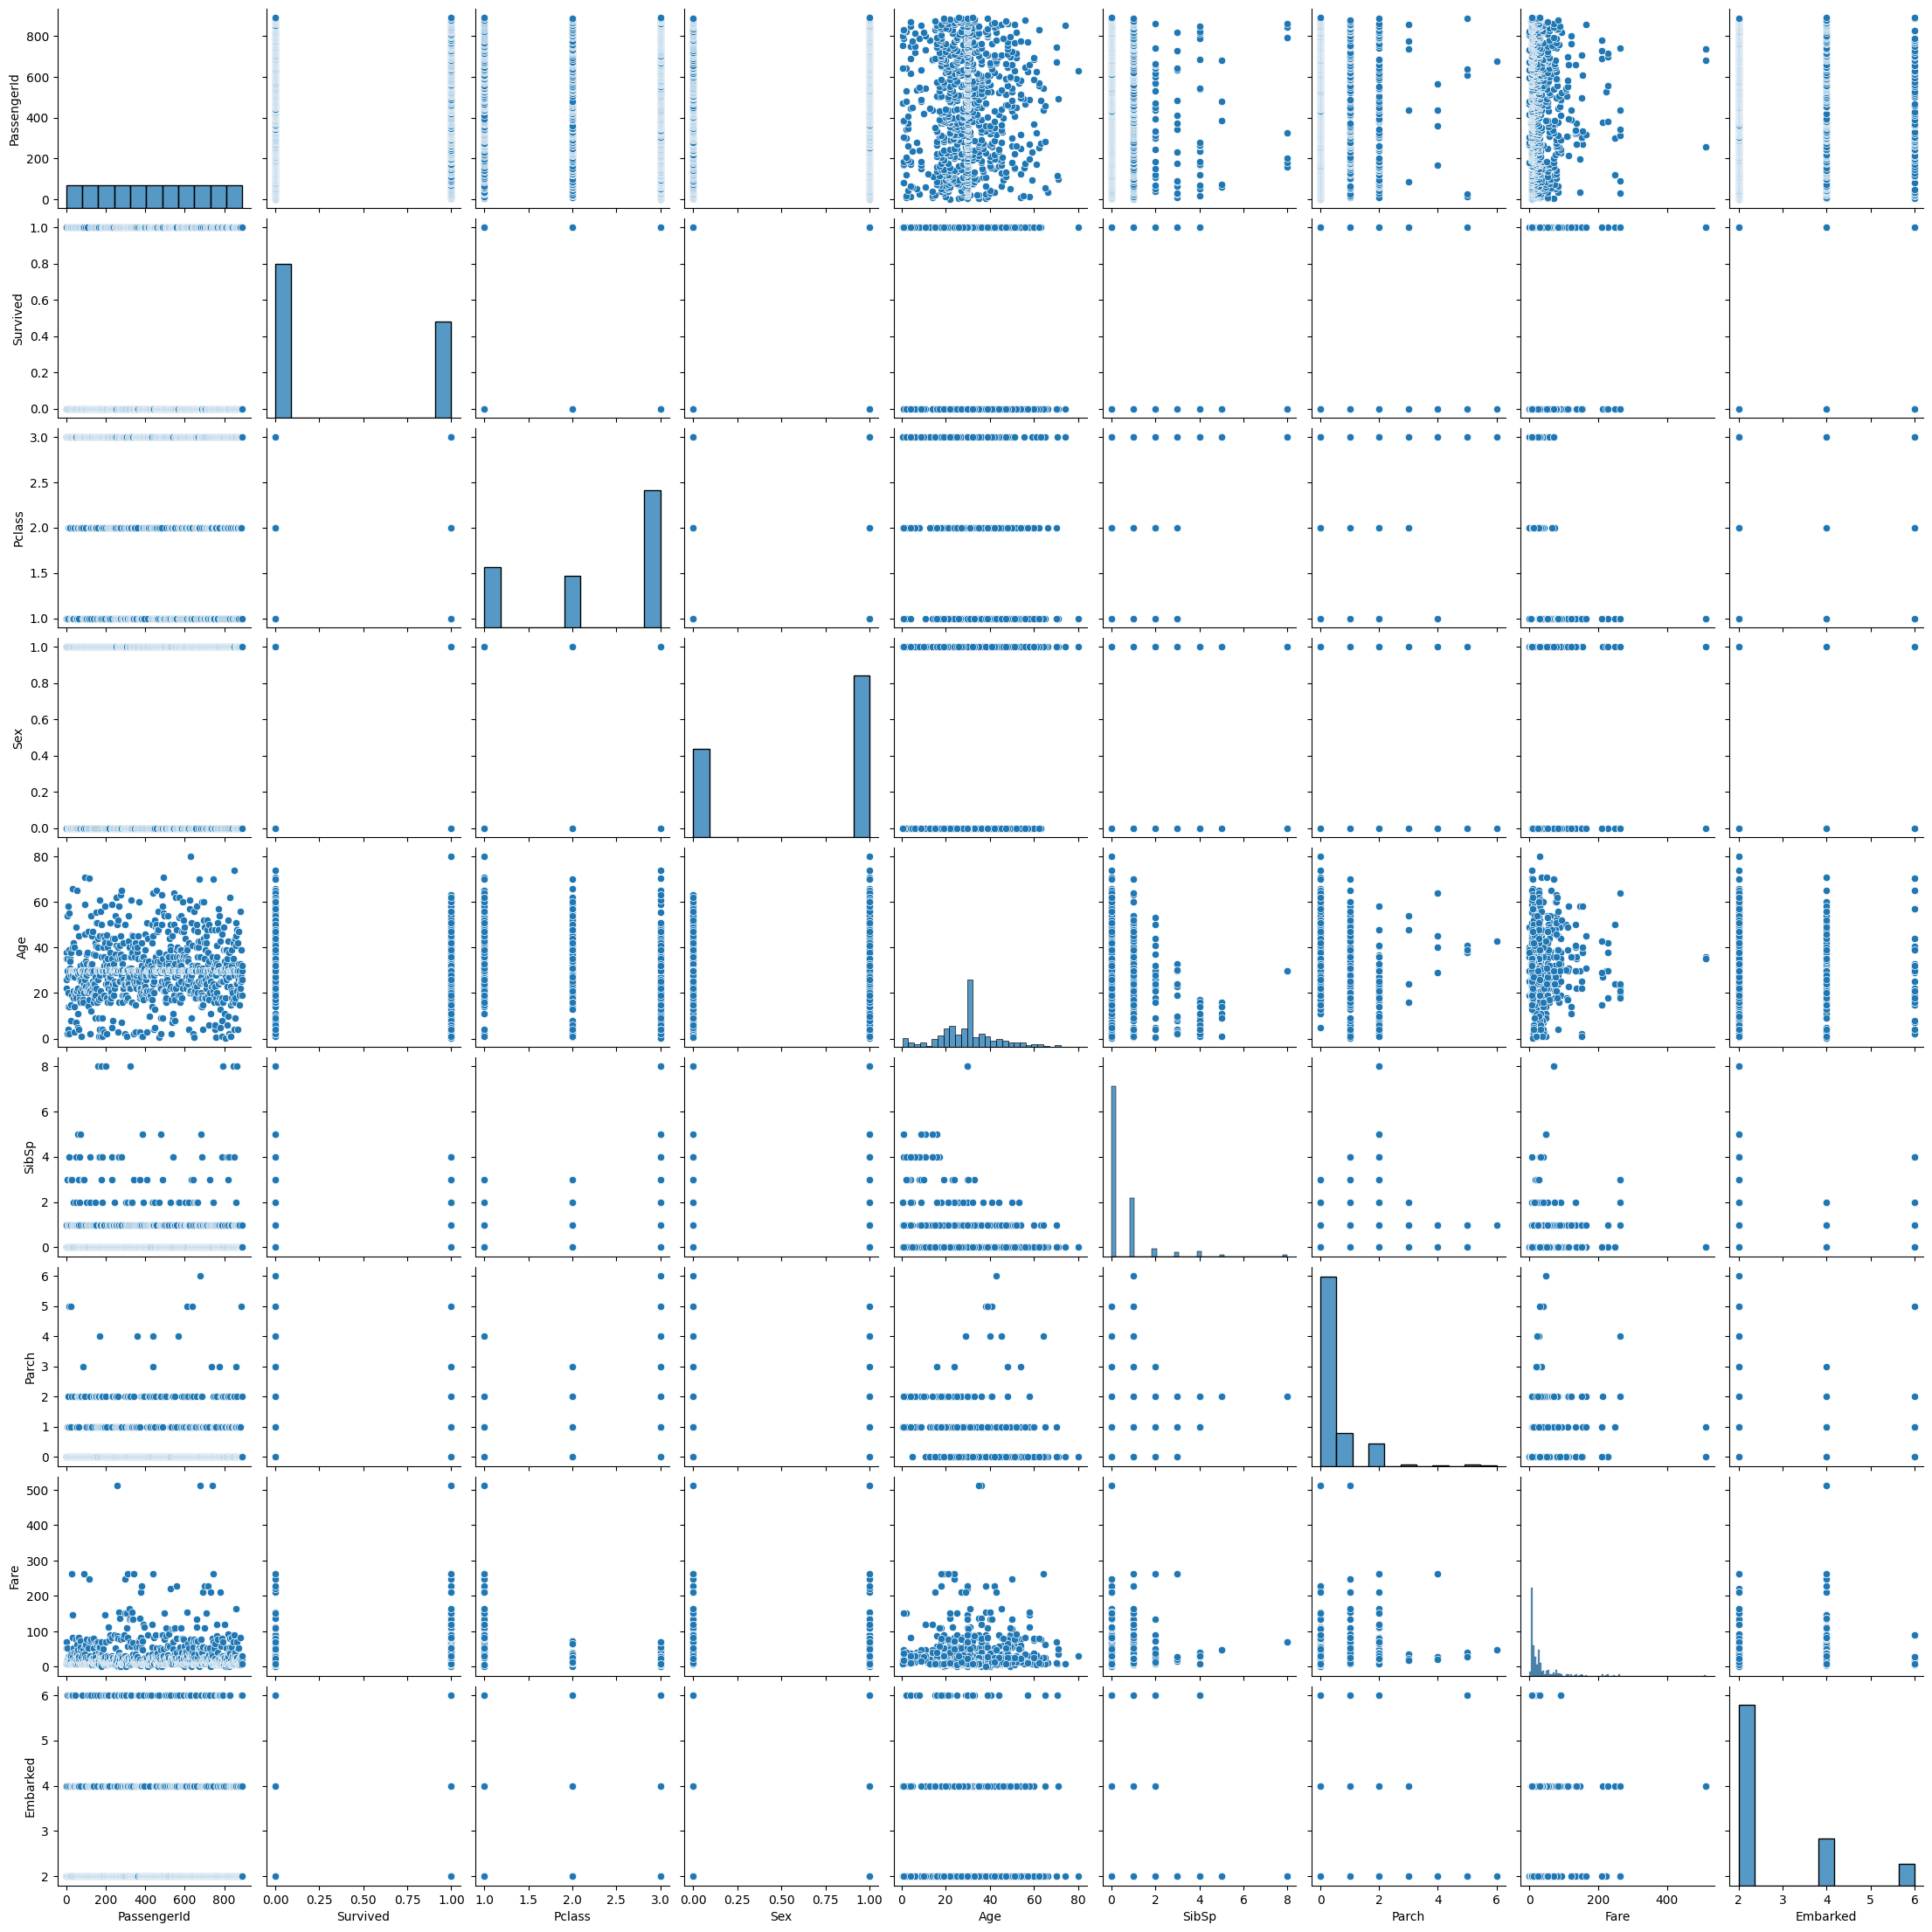

In [15]:
sns.pairplot(dt)

In [16]:
dt.drop(['Ticket','Fare'], axis=1, inplace=True)

dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2


In [17]:
dt['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
dt.drop('Name', axis=1, inplace=True)
dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,4
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [20]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [21]:
dt = dt[['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked','Survived']]

In [22]:
dt.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,2,0
1,2,1,0,38.0,1,0,4,1
2,3,3,0,26.0,0,0,2,1
3,4,1,0,35.0,1,0,2,1
4,5,3,1,35.0,0,0,2,0


In [23]:
main_df = dt.copy()

## Test Data

In [24]:
dt_test = pd.read_csv('TestFinal.csv')
dt_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,6
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,6
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [25]:
final_df = pd.concat([dt_test, dt], axis=0)
final_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,6,NaN
1,893,3,0,47.0,1,0,2,NaN
2,894,2,1,62.0,0,0,6,NaN
3,895,3,1,27.0,0,0,2,NaN
4,896,3,0,22.0,1,1,2,NaN


In [26]:
final_df.shape

(1309, 8)

In [27]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

final_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,6,NaN
1,893,3,0,47.0,1,0,2,NaN
2,894,2,1,62.0,0,0,6,NaN
3,895,3,1,27.0,0,0,2,NaN
4,896,3,0,22.0,1,1,2,NaN


In [28]:
final_df.shape

(1309, 8)

In [29]:
final_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Embarked         0
Survived       418
dtype: int64

In [30]:
final_df['Survived'].unique()

array([nan,  0.,  1.])

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1309 non-null   int64  
 7   Survived     891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 92.0 KB


In [32]:
final_df['Survived'] = final_df['Survived'].fillna(final_df['Survived'].mean())

In [33]:
final_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Survived       0
dtype: int64

In [34]:
final_df['Survived'].unique()

array([0.38383838, 0.        , 1.        ])

In [35]:
final_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,6,0.383838
1,893,3,0,47.0,1,0,2,0.383838
2,894,2,1,62.0,0,0,6,0.383838
3,895,3,1,27.0,0,0,2,0.383838
4,896,3,0,22.0,1,1,2,0.383838


In [36]:
final_df.shape

(1309, 8)

In [37]:
df_Train=final_df.iloc[:650,:]
df_Test=final_df.iloc[650:,:]

In [38]:
df_Train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,6,0.383838
1,893,3,0,47.0,1,0,2,0.383838
2,894,2,1,62.0,0,0,6,0.383838
3,895,3,1,27.0,0,0,2,0.383838
4,896,3,0,22.0,1,1,2,0.383838


In [39]:
df_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
232,233,2,1,59.000000,0,0,2,0.0
233,234,3,0,5.000000,4,2,2,1.0
234,235,2,1,24.000000,0,0,2,0.0
235,236,3,0,29.699118,0,0,2,0.0
236,237,2,1,44.000000,1,0,2,0.0


In [40]:
df_Test.drop(['Survived'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12000\3109684841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['Survived'],axis=1,inplace=True)


In [41]:
X_train=df_Train.drop(['Survived'],axis=1)
y_train=df_Train['Survived']

In [42]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,6
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,6
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [43]:
y_train.head()

0    0.383838
1    0.383838
2    0.383838
3    0.383838
4    0.383838
Name: Survived, dtype: float64

## Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()
rand.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
import pickle
fileName = 'finalmodel.pkl'
pickle.dump(rand, open(fileName,'wb'))

In [46]:
y_pred = rand.predict(df_Test)
y_pred

array([0.08      , 0.43      , 0.09      , 0.66      , 0.09      ,
       0.63      , 0.11      , 0.08      , 0.69      , 0.72      ,
       0.08      , 0.03      , 0.09      , 0.28      , 0.64      ,
       0.57      , 0.26      , 0.08      , 0.03      , 0.6       ,
       0.25      , 0.03      , 0.54      , 0.57      , 0.75      ,
       0.74      , 0.75      , 0.57      , 0.07      , 0.11383838,
       0.24      , 0.28      , 0.73      , 0.08      , 0.11      ,
       0.04      , 0.65      , 0.74      , 0.25      , 0.04      ,
       0.69      , 0.29      , 0.73      , 0.65      , 0.52      ,
       0.08      , 0.11      , 0.59      , 0.08      , 0.03      ,
       0.17      , 0.06      , 0.25      , 0.09      , 0.03      ,
       0.03      , 0.08      , 0.69      , 0.64      , 0.65      ,
       0.16      , 0.64      , 0.05      , 0.26      , 0.11      ,
       0.61      , 0.25      , 0.56      , 0.73      , 0.05      ,
       0.06      , 0.75      , 0.03      , 0.32      , 0.75   

In [48]:
pred = pd.DataFrame(y_pred)
new_df = pd.read_csv('gender_submission.csv')
dataset = pd.concat([new_df['PassengerId'],pred], axis=1)
dataset.columns = ['PassengerId', 'Survived']
dataset.to_csv('Prediction_Submission.csv', index=False)